# Primera Etapa del Proyecto Nike

En este proyecto de análisis de datos, nos sumergiremos en el mundo del marketing de Nike, una de las marcas más reconocidas a nivel mundial en la industria del calzado y la ropa deportiva. A través de este análisis, exploraremos diversos conjuntos de datos relacionados con las estrategias de marketing de Nike, su impacto en el mercado y la percepción de los consumidores.



El objetivo principal de este primer notebook es realizar la limpieza y procesamiento de todos los conjuntos de datos utilizados en nuestro análisis. 

##### Conjunto de Datos Utilizados:

[Archivo_1:Data_set_nike](https://data.world/crawlfeeds/products-dataset-from-nike)

[Archivo_2:Sales_USA](https://www.kaggle.com/datasets/krishnavamsis/nike-sales)

[Archivo_3:AdidasvsNike](https://www.kaggle.com/datasets/kaushiksuresh147/adidas-vs-nike)

[Archivo_5:Fabricas](https://www.kaggle.com/datasets/mexwell/nike-manufacturing-locations)

### Indice

1. Librerías

2. Lectura de los diferentes Data Frame

3. Limpieza 

4. Preprocesamiento

5. Conclusión sobre cada data set

## 1. Librerías

In [84]:
#Librerias
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
import matplotlib.pyplot as plt

## 2. Lecturas del conjunto de datos

In [3]:
#Lectura de los archivos
#Primer grupo de archivos a comparar
df = pd.read_csv(r"nike_2020_04_13.csv")
df1 = pd.read_csv(r"Nike Dataset.csv")

In [4]:
#Segundo grupo de archivos a comparar
df_adi_nik = pd.read_csv(r"Adidas Vs Nike.csv")
df_manuf = pd.read_csv(r"C:\Users\alede\Desktop\TERCER_PROYECTO\manufacturinglocation.csv", sep=';')

## 3. Limpieza de Datos

* Verificar los archivos del primer grupo

In [5]:
df.shape

(643, 12)

In [6]:
df1.shape

(9360, 9)

In [7]:
df.columns

Index(['URL', 'Product Name', 'Product ID', 'Listing Price', 'Sale Price',
       'Discount', 'Brand', 'Description', 'Rating', 'Reviews', 'Images',
       'Last Visited'],
      dtype='object')

In [8]:
df1.columns

Index(['Invoice Date', 'Product', 'Region', 'Retailer', 'Sales Method',
       'State', 'Price per Unit', 'Total Sales', 'Units Sold'],
      dtype='object')

In [9]:
df.head(1)

,URL,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Images,Last Visited
0,https://www.nike.com/in/t/air-force-1-07-essen...,Nike Air Force 1 '07 Essential,CJ1646-600,0,7495,0,Nike,Let your shoe game shimmer in the Nike Air For...,0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_...",2020-04-13T15:27:56


In [10]:
df1.head()

,Invoice Date,Product,Region,Retailer,Sales Method,State,Price per Unit,Total Sales,Units Sold
0,01-01-2020,Men's Street Footwear,Northeast,Foot Locker,In-store,New York,50,6000,120
1,02-01-2020,Men's Athletic Footwear,Northeast,Foot Locker,In-store,New York,50,5000,100
2,03-01-2020,Women's Street Footwear,Northeast,Foot Locker,In-store,New York,40,4000,100
3,04-01-2020,Women's Athletic Footwear,Northeast,Foot Locker,In-store,New York,45,3825,85
4,05-01-2020,Men's Apparel,Northeast,Foot Locker,In-store,New York,60,5400,90


In [11]:
#Verificar duplicados
df.duplicated().sum()

0

In [12]:
df1.duplicated().sum()

0

<Axes: >

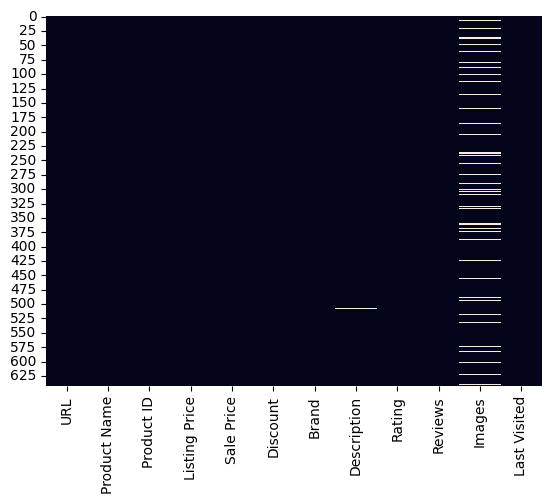

In [13]:
#Verificacion de valores nulos
sns.heatmap(df.isnull(), cbar=False)

In [14]:
df.dtypes

URL               object
Product Name      object
Product ID        object
Listing Price      int64
Sale Price         int64
Discount           int64
Brand             object
Description       object
Rating           float64
Reviews            int64
Images            object
Last Visited      object
dtype: object

<Axes: >

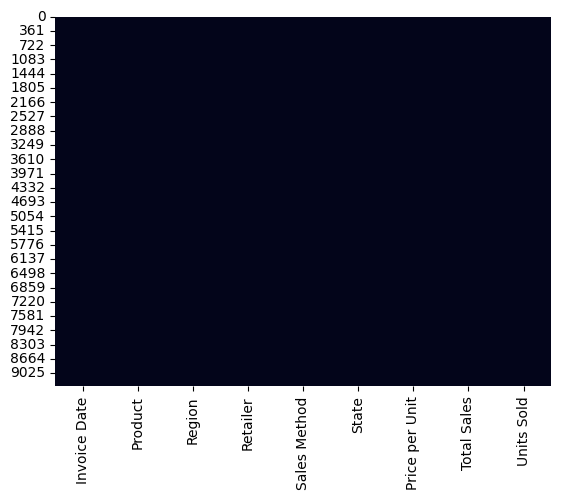

In [15]:
#Verificacion de valores nulos df1
sns.heatmap(df1.isnull(), cbar=False)

In [16]:
df1.dtypes

Invoice Date      object
Product           object
Region            object
Retailer          object
Sales Method      object
State             object
Price per Unit     int64
Total Sales        int64
Units Sold         int64
dtype: object

* Verificar archivos del segundo grupo

In [17]:
df_adi_nik.shape

(3268, 10)

In [18]:
df_adi_nik.columns

Index(['Product Name', 'Product ID', 'Listing Price', 'Sale Price', 'Discount',
       'Brand', 'Description', 'Rating', 'Reviews', 'Last Visited'],
      dtype='object')

In [19]:
df_adi_nik.head(1)

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13T15:06:14


In [20]:
df_adi_nik.duplicated().sum()

0

<Axes: >

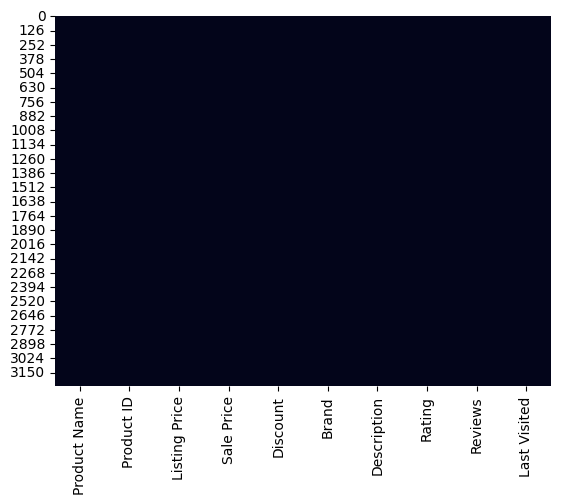

In [21]:
#Verificacion de valores nulos df_adi_nik
sns.heatmap(df_adi_nik.isnull(), cbar=False)

In [22]:
df_adi_nik.dtypes

Product Name      object
Product ID        object
Listing Price      int64
Sale Price         int64
Discount           int64
Brand             object
Description       object
Rating           float64
Reviews            int64
Last Visited      object
dtype: object

In [23]:
df_manuf.shape

(639, 16)

In [24]:
df_manuf.columns

Index(['Factory Name', 'Factory Type', 'Product Type Type',
       'Nike, Inc. Brand(s)', 'Events', 'Supplier Group', 'Address', 'City',
       'State', 'Postal Code', 'Country / Region', 'Region', 'Total Workers',
       'Line Workers', '% Female Workers', '% Migrant Workers'],
      dtype='object')

In [25]:
df_manuf.head(1)

,Factory Name,Factory Type,Product Type Type,"Nike, Inc. Brand(s)",Events,Supplier Group,Address,City,State,Postal Code,Country / Region,Region,Total Workers,Line Workers,% Female Workers,% Migrant Workers
0,"A & K Designs, Inc.",FINISHED GOODS,Apparel,Nike,NaN,A & K DESIGNS,8564 NE Alderwood Road,Portland,Oregon,97220,USA,AMERICAS,111,95,73,0


In [26]:
df_manuf.duplicated().sum()

0

<Axes: >

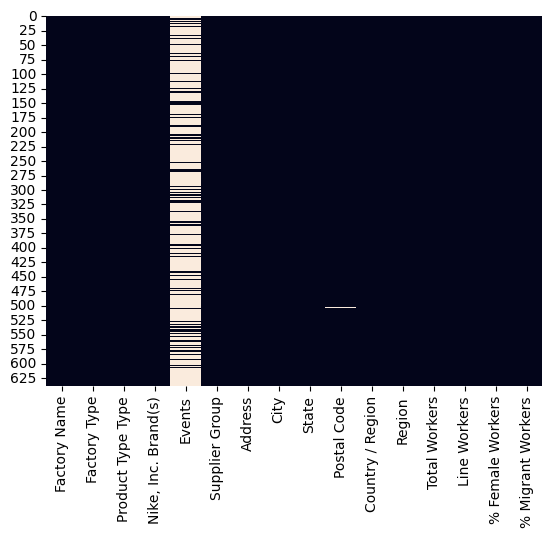

In [27]:
#Verificacion de valores nulos df_manuf
sns.heatmap(df_manuf.isnull(), cbar=False)

In [28]:
df_manuf.dtypes

Factory Name           object
Factory Type           object
Product Type Type      object
Nike, Inc. Brand(s)    object
Events                 object
Supplier Group         object
Address                object
City                   object
State                  object
Postal Code            object
Country / Region       object
Region                 object
Total Workers           int64
Line Workers            int64
% Female Workers       object
% Migrant Workers       int64
dtype: object

## 4. Preprocesamiento

Comenzaremos por realizar el procesamiento exhaustivo de los datos, lo que implica  manejar valores faltantes, eliminar duplicados, corregir posibles errores en los datos y formatear adecuadamente los tipos de datos según sea necesario. Este paso es crucial para garantizar la calidad y la integridad de nuestros datos antes de realizar cualquier análisis.

In [29]:
#Hacer un df copia y eliminar columnas innecesarias
nike_product = df.copy()
nike_product.drop(['URL' , 'Listing Price', 
'Discount', 'Brand'] , axis=1, inplace=True)

In [30]:
nike_product['Images'].isnull().sum()

71

In [31]:
nike_product['Description'].isnull().sum()

3

In [ ]:
nike_product['Images'].fillna('No Image', inplace=True)
nike_product['Description'].fillna('No Description', inplace=True)


In [33]:
nike_product['Sale Price'].unique()

array([ 7495,  9995,  5995, 15995, 14995, 10495,  7995, 16995,  5495,
        5597, 10995, 11995, 18995,  2495,  1995, 11997, 13995,  8995,
        7595,  6495, 12995, 22995, 11197,  4995,  6995, 24995,  8397,
        7797,  5997,  8795,  7697, 13597,  6997,  9597,  8495,  4797,
        8797,  6597, 12797,  5947, 20995, 10497,  3997,  7197,  1595,
       15197,  9637, 13495,  5247, 14495,  4497,  5295, 21995,  7997,
        8997,  6397, 14397,  3995, 10197,  4495,  5397,  9495,  7295,
        3497, 15997,  6297,  2795, 19995,  4897,  2097, 11897,  9097,
       10397,  6595,  9797, 12597,  3147, 17995, 13297,  3597,  6317,
        4197,  2397,  4547,  3357,  2995,  3695,  6797, 36500,  3197,
        7597], dtype=int64)

In [34]:
nike_product['Rating'].dtype

dtype('float64')

In [35]:
columna_fecha = 'Last Visited'
try:
    nike_product[columna_fecha] = pd.to_datetime(nike_product[columna_fecha])
    print("La columna '{}' está en formato de fecha.".format(columna_fecha))
except ValueError:
    print("La columna '{}' no está en formato de fecha.".format(columna_fecha))

La columna 'Last Visited' está en formato de fecha.


In [36]:
# Detectar Outliers de las variables numericas
def detectar_outlierscol(nike_product, cols):
    z_scores = zscore(nike_product[cols])
    abs_z_scores = np.abs(z_scores)
    return (abs_z_scores > 3) | (abs_z_scores < -3)

outliers = detectar_outlierscol(nike_product, ['Sale Price', 'Reviews'])
outliers_sum = outliers.sum()
print(outliers_sum)

Sale Price     5
Reviews       15
dtype: int64


In [37]:
# Se corrige los outliers de las dos variables numericas
def arreglar_outliers_simple(nike_product, cols):
    
    # Iteramos sobre cada columna del DataFrame
    for col in cols:
        # Calculamos los percentiles 25 y 75 (Q1 y Q3)
        Q1 = nike_product[col].quantile(0.25)
        Q3 = nike_product[col].quantile(0.75)
 
        # Calculamos el rango intercuartílico (IQR)
        IQR = Q3 - Q1
 
        # Calculamos los límites del intervalo
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR
 
        # Reemplazamos los valores atípicos por los límites del intervalo
        nike_product[col] = nike_product[col].apply(lambda x: lower_limit if x < lower_limit else (upper_limit if x > upper_limit else x))
 
    return nike_product
nike_product = arreglar_outliers_simple(nike_product, ['Sale Price', 'Reviews'])




In [38]:
# Detectar Outliers en las variables categoricas
def detectar_outlierscat(nike_product, cols):
    outliers_dict = {}
    for col in cols:
        if nike_product[col].dtype == 'object':
        
            frecuencia_categorias = nike_product[col].value_counts()
            
            
            percentil_95 = frecuencia_categorias.quantile(0.95)#Calcular el percentil
            
            categorias_outliers = frecuencia_categorias[frecuencia_categorias > percentil_95].index.tolist()
            
            outliers_dict[col] = categorias_outliers
            
    return outliers_dict


In [39]:
# Llamar a la función 
outliers_dict = detectar_outlierscat(nike_product, ['Product Name', 'Product ID','Description', 'Images'])

# Imprimir el diccionario creado arriba
for col, outliers in outliers_dict.items():
    print(f"Columna '{col}': {len(outliers)} outliers -> {outliers}")

# Sumar el número total de outliers encontrados en todas las columnas
outliers_sum_cat = sum(len(valores) for valores in outliers_dict.values())

print("Suma de outliers en variables categóricas:", outliers_sum_cat)


Columna 'Product Name': 16 outliers -> ['Nike Air Max 90', 'Nike Air Max 270 React', 'Nike Air Max 97', 'Nike Air Zoom Pegasus 36', 'Nike Air VaporMax 360', 'Nike Air Max 720', 'Nike MX-720-818', 'Nike Air Max 2090', 'Nike Metcon 5 AMP', 'Nike Zoom Pegasus Turbo 2', 'Nike Air Max 98', 'Nike Air Max 270 React ENG', 'Nike Free RN 5.0', 'Nike React Element 55 SE', "Nike Air Force 1 '07", 'Nike Mercurial Superfly 7 Elite SE FG']
Columna 'Product ID': 1 outliers -> ['CD6720-808']
Columna 'Description': 8 outliers -> ['The Nike Metcon 5 AMP arms you with stability for heavy lifting and traction for sprints during high-impact training. It combines breathability and durability to be your secret weapon in the gym.', 'Kevin Durant always looks relaxed—until he attacks. His game is reserved yet explosive, difficult to guard and impossible to stop. The KD12 was built for his dominance and endless energy all game long, with the latest innovation in Nike Zoom Air technology.', "The Nike React Metcon

# Conclusión Datos de Nike_Product

Se han verificado las columnas que si se van a utilizar como:
- 'Sale price' no tiene valores duplicados, esta en formato int pero no sabemos que tipo de moneda es. 
- 'Review' esta en formato int. Es una varaible interesante para correlacionar con el precio. 
- 'Rating' esta en float. Tambien se podrá correlacionar
- 'Last Visited' se verifica si está en formato fecha y se comprueba que si. 
- Se verifica los outliers de las variables numericas y se corrigen ambas. Esta decisión solo se toma en este DF porque con estos datos no se realizaran modelos predictivos. Se usarán para la App que se creará. 
- Se verifica los outliers de las variables categoricas y se han encontrado outliers en cuatro columnas categóricas diferentes:
Se han encontrado 16 outliers en la columna 'Product Name'.
Se ha encontrado 1 outlier en la columna 'Product ID'.
Se han encontrado 7 outliers en la columna 'Description'.
Se ha encontrado 1 outlier en la columna 'Images'.

Total de outliers en variables categóricas: 25:


Con respecto a los outliers de las variables categoricas se identifican pero no se modifican ya que al ser tipo string tienen descripciones relevantes para el análisis y los siguientes pasos a tomar.

In [40]:
#Hacer un df copia 
nike_sales = df1.copy()


In [41]:
nike_sales['Invoice Date'].head()

0    01-01-2020
1    02-01-2020
2    03-01-2020
3    04-01-2020
4    05-01-2020
Name: Invoice Date, dtype: object

In [42]:
columna_fecha2 = 'Invoice Date'
try:
    nike_sales[columna_fecha2] = pd.to_datetime(nike_sales[columna_fecha2])
    print("La columna '{}' está en formato de fecha.".format(columna_fecha2))
except ValueError:
    print("La columna '{}' no está en formato de fecha.".format(columna_fecha2))

La columna 'Invoice Date' no está en formato de fecha.


In [43]:
nike_sales['Invoice Date'] = pd.to_datetime(nike_sales['Invoice Date'], format='%d-%m-%Y')


In [44]:
nike_sales['Units Sold'].head(1)

0    120
Name: Units Sold, dtype: int64

In [58]:
nike_sales.columns

Index(['Invoice Date', 'Product', 'Region', 'Retailer', 'Sales Method',
       'State', 'Price per Unit', 'Total Sales', 'Units Sold'],
      dtype='object')

In [59]:
# Detectar Outliers de las variables numericas
def detectar_outlierscol(nike_sales, cols):
    z_scores = zscore(nike_sales[cols])
    abs_z_scores = np.abs(z_scores)
    return (abs_z_scores > 3) | (abs_z_scores < -3)

outliers = detectar_outlierscol(nike_sales, ['Price per Unit', 'Total Sales', 'Units Sold'])
outliers_sum = outliers.sum()
print(outliers_sum)

Price per Unit     57
Total Sales       181
Units Sold        116
dtype: int64


In [61]:
# Se corrige los outliers de las dos variables numericas
def arreglar_outliers_simple(nike_sales, cols):
    
    # Iteramos sobre cada columna del DataFrame
    for col in cols:
        # Calculamos los percentiles 25 y 75 (Q1 y Q3)
        Q1 = nike_sales[col].quantile(0.25)
        Q3 = nike_sales[col].quantile(0.75)
 
        # Calculamos el rango intercuartílico (IQR)
        IQR = Q3 - Q1
 
        # Calculamos los límites del intervalo
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR
 
        # Reemplazamos los valores atípicos por los límites del intervalo
        nike_sales[col] = nike_sales[col].apply(lambda x: lower_limit if x < lower_limit else (upper_limit if x > upper_limit else x))
 
    return nike_sales
nike_sales = arreglar_outliers_simple(nike_sales, [ 'Total Sales', 'Units Sold'])


In [63]:
# Verificacion 
outliers = detectar_outlierscol(nike_sales, ['Price per Unit', 'Total Sales', 'Units Sold'])
outliers_sum = outliers.sum()
print(outliers_sum)

Price per Unit    57
Total Sales        0
Units Sold         0
dtype: int64


In [64]:
def detectar_outlierscat(nike_sales, cols):
    outliers_dict1 = {}
    for col in cols:
        if nike_sales[col].dtype == 'object':
        
            frecuencia_categorias = nike_sales[col].value_counts()
            
            
            percentil_95 = frecuencia_categorias.quantile(0.95)#Calcular el percentil
            
            categorias_outliers = frecuencia_categorias[frecuencia_categorias > percentil_95].index.tolist()
            
            outliers_dict1[col] = categorias_outliers
            
    return outliers_dict1

In [66]:
# Llamar a la función 
outliers_dict1 = detectar_outlierscat(nike_sales, ['Product', 'Region','Retailer', 'Sales Method', 'State'])

# Imprimir el diccionario creado arriba
for col, outliers in outliers_dict1.items():
    print(f"Columna '{col}': {len(outliers)} outliers -> {outliers}")

# Sumar el número total de outliers encontrados en todas las columnas
outliers_sum_cat1 = sum(len(valores) for valores in outliers_dict1.values())

print("Suma de outliers en variables categóricas:", outliers_sum_cat1)

Columna 'Product': 0 outliers -> []
Columna 'Region': 1 outliers -> ['Northeast']
Columna 'Retailer': 1 outliers -> ['Foot Locker']
Columna 'Sales Method': 1 outliers -> ['Online']
Columna 'State': 2 outliers -> ['California', 'Texas']
Suma de outliers en variables categóricas: 5


# Conclusión

Se verifican las columnas:
- 'Invoice Date' y se verifica que no está en formato fecha, por eso se procede a modificarla. 
- 'Price per Unit' se verifica que este en int y además que no tenga ningún simbolo
- 'Total Sales' mismo procedimiento que la columna anterior
- Se verifican los outliers de las variables numericas y se identifican en tres de ellas. Se arreglan en dos y se deja tal como está la variable Y ('Price per Unit)
- Se verifican los outliers de las varibales categoricas y se identifican 5 datos inusuales. En este caso solo se identifican pero no se modifican ya que no se observan errores.




In [45]:
#Hacer un df copia y eliminar columnas innecesarias
adidas_nike = df_adi_nik.copy()
adidas_nike.drop(['Product ID'], axis=1, inplace=True)

In [46]:
adidas_nike['Last Visited'].tail(1)

3267    2020-04-13T15:42:57
Name: Last Visited, dtype: object

In [47]:
columna_fecha3 = 'Last Visited'
try:
    adidas_nike[columna_fecha3] = pd.to_datetime(adidas_nike[columna_fecha3])
    print("La columna '{}' está en formato de fecha.".format(columna_fecha3))
except ValueError:
    print("La columna '{}' no está en formato de fecha.".format(columna_fecha3))

La columna 'Last Visited' está en formato de fecha.


In [48]:
adidas_nike['Discount'].head(1)

0    50
Name: Discount, dtype: int64

In [49]:
adidas_nike['Sale Price'].head(1)

0    7499
Name: Sale Price, dtype: int64

In [50]:
adidas_nike['Listing Price'].head(1)

0    14999
Name: Listing Price, dtype: int64

In [68]:
# Detectar Outliers de las variables numericas
def detectar_outlierscol(adidas_nike, cols):
    z_scores = zscore(adidas_nike[cols])
    abs_z_scores = np.abs(z_scores)
    return (abs_z_scores > 3) | (abs_z_scores < -3)

outliers = detectar_outlierscol(adidas_nike, ['Listing Price', 'Sale Price', 'Discount', 'Rating'])
outliers_sum = outliers.sum()
print(outliers_sum)

Listing Price    30
Sale Price       47
Discount          0
Rating            0
dtype: int64


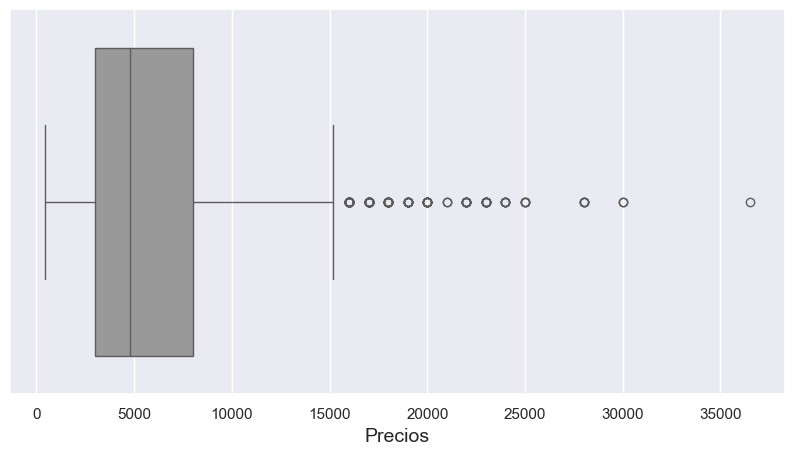

In [89]:
# Visualizar la deviacion de la variable 'Sale Price'
plt.figure(figsize=(10, 5))  # Tamaño del gráfico
sns.set(style="darkgrid")  # Estilo de la cuadrícula de Seaborn
fig = sns.boxplot(x="Sale Price", data=adidas_nike , color = '#999999')  # Crear el gráfico de cajas y bigotes color gris
fig.set_xlabel('Precios', fontsize=14)
plt.show()

In [77]:
# Se corrige los outliers solo una variable numerica
def arreglar_outliers_simple(adidas_nike, cols):
    
    # Iteramos sobre cada columna del DataFrame
    for col in cols:
        # Calculamos los percentiles 25 y 75 (Q1 y Q3)
        Q1 = adidas_nike[col].quantile(0.25)
        Q3 = adidas_nike[col].quantile(0.75)
 
        # Calculamos el rango intercuartílico (IQR)
        IQR = Q3 - Q1
 
        # Calculamos los límites del intervalo
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR
 
        # Reemplazamos los valores atípicos por los límites del intervalo
        adidas_nike[col] = adidas_nike[col].apply(lambda x: lower_limit if x < lower_limit else (upper_limit if x > upper_limit else x))
 
    return adidas_nike
adidas_nike = arreglar_outliers_simple(adidas_nike, ['Listing Price',])

In [76]:
def detectar_outlierscat(adidas_nike, cols):
    outliers_dict2 = {}
    for col in cols:
        if adidas_nike[col].dtype == 'object':
        
            frecuencia_categorias = adidas_nike[col].value_counts()
            
            
            percentil_95 = frecuencia_categorias.quantile(0.95)#Calcular el percentil
            
            categorias_outliers = frecuencia_categorias[frecuencia_categorias > percentil_95].index.tolist()
            
            outliers_dict2[col] = categorias_outliers
            
    return outliers_dict2

In [73]:
# Llamar a la función 
outliers_dict2 = detectar_outlierscat(adidas_nike, ['Product Name', 'Brand','Description'])

# Imprimir el diccionario creado arriba
for col, outliers in outliers_dict2.items():
    print(f"Columna '{col}': {len(outliers)} outliers -> {outliers}")

# Sumar el número total de outliers encontrados en todas las columnas
outliers_sum_cat2 = sum(len(valores) for valores in outliers_dict2.values())

print("Suma de outliers en variables categóricas:", outliers_sum_cat2)

Columna 'Product Name': 52 outliers -> ["Women's adidas Originals Sambarose Shoes", "Men's adidas Originals Supercourt Shoes", "Men's adidas Originals Stan Smith Shoes", "Men's adidas Originals Continental 80 Shoes", 'Nike Air Max 90', "Women's adidas Originals Sleek Shoes", 'Unisex adidas Originals Marathon Tech Shoes', "Women's adidas Originals NMD_R1 Shoes", 'Unisex adidas Originals Skateboarding 3MC Shoes', "Men's adidas Sport Inspired Grand Court Shoes", "Men's adidas Running Duramo 9 Shoes", "Women's adidas Originals Continental 80 Shoes", "Women's adidas Running Ultraboost 19 Shoes", "Men's adidas Originals Rivalry Low Shoes", "Women's adidas Originals Falcon Shoes", "Men's adidas Sport Inspired VL Court 2.0 Shoes", "Women's adidas Originals Supercourt Shoes", "Men's adidas Originals Forest Grove Shoes", "Women's adidas Originals Stan Smith Shoes", "Women's adidas Originals I-5923 Shoes", "Men's adidas Originals Superstar Shoes", "Men's adidas Sport Inspired Blaze Runner Shoes",

# Conclusión

- Se elimina la columna 'Product ID' ya que al verificar no se le considera necesaria.

- 'Last Visited' se verifica la columna y se observa el formato de la columna es tipo fecha y con hora ISO 8601  (YYYY-MM-DDTHH:MM:SS)
- Se verifican las demás columnas y se visualiza que en 'Sale Price' y en ' Listing Price' no hay simbolos y no se observa el tipo de moneda. 
- Se verifican los outliers de las variables y se procede a arreglar todos menos 'Sales Price' ya que será nuestra variable objetivo más adelante.
- Se verifican los outliers de las variables categoricas y se visualiza que hay 112 valores atipicos en este DF.

In [51]:
#Hacer un df copia y eliminar columnas innecesarias
location = df_manuf.copy()
location.drop(['Events',  'Postal Code'], axis=1, inplace=True)

In [52]:
location['% Female Workers'].unique()

array(['73', '79', '87', '86', '75', '96', '92', '81', '53', '95', '48',
       '57', '90', '49', '38', '97', '52', '0', '84', '56', '35', '42',
       '51', '30', '17', '11', '1', '89', '36', '65', '85', '83', '80',
       '72', '77', '62', '88', '91', '64', '93', '70', '15', '71', '22',
       '68', '63', '37', '10', '20', '4', '31', '21', '39', '55', '40',
       '54', '59', '60', '78', '61', '66', '67', '23', '14', '16', '27',
       '45', '98', '69', '33', '43', '47', '44', '41', '50', '28', '76',
       '46', '58', '3', '99', '26', '12', '24', '34', '82', '29', '100',
       '74', '6', '9', '94', '32', '19', '18', '13', '17,2972972972973',
       '25'], dtype=object)

In [53]:
#Modificamos la columna '% Female Workers' de object a float por este valor: '17,297297292973'
location['% Female Workers'] = location['% Female Workers'].str.replace(',', '.').astype(float)

In [54]:
location['Nike, Inc. Brand(s)'].unique()

array(['Nike', 'Converse'], dtype=object)

In [55]:
num_converse = location['Nike, Inc. Brand(s)'].str.contains('converse', case=False).sum()
print("Número de filas que contenían 'converse':", num_converse)

Número de filas que contenían 'converse': 36


In [56]:
location = location[~location['Nike, Inc. Brand(s)'].str.contains('converse', case=False)]
# Convertimos las filas que dice converse a False y True a Nike
location.reset_index(drop=True, inplace=True)
#Restablecemos el indice despues de eliminar 

In [75]:
# Detectar Outliers de las variables numericas
def detectar_outlierscol(location, cols):
    z_scores = zscore(location[cols])
    abs_z_scores = np.abs(z_scores)
    return (abs_z_scores > 3) | (abs_z_scores < -3)

outliers = detectar_outlierscol(location, ['Total Workers', 'Line Workers','% Female Workers', '% Migrant Workers'])
outliers_sum = outliers.sum()
print(outliers_sum)

Total Workers        19
Line Workers         18
% Female Workers      0
% Migrant Workers    25
dtype: int64


In [78]:
# Se corrige los outliers de las variables numericas
def arreglar_outliers_simple(location, cols):
    
    # Iteramos sobre cada columna del DataFrame
    for col in cols:
        # Calculamos los percentiles 25 y 75 (Q1 y Q3)
        Q1 = location[col].quantile(0.25)
        Q3 = location[col].quantile(0.75)
 
        # Calculamos el rango intercuartílico (IQR)
        IQR = Q3 - Q1
 
        # Calculamos los límites del intervalo
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR
 
        # Reemplazamos los valores atípicos por los límites del intervalo
        location[col] = location[col].apply(lambda x: lower_limit if x < lower_limit else (upper_limit if x > upper_limit else x))
 
    return location
location = arreglar_outliers_simple(location, ['Total Workers', 'Line Workers','% Migrant Workers'])

In [81]:
#Verificación de la reparacion de los outliers
outliers = detectar_outlierscol(location, ['Total Workers', 'Line Workers','% Female Workers', '% Migrant Workers'])
outliers_sum = outliers.sum()
print(outliers_sum)

Total Workers        0
Line Workers         0
% Female Workers     0
% Migrant Workers    0
dtype: int64


In [82]:
def detectar_outlierscat(location, cols):
    outliers_dict3 = {}
    for col in cols:
        if location[col].dtype == 'object':
        
            frecuencia_categorias = location[col].value_counts()
            
            
            percentil_95 = frecuencia_categorias.quantile(0.95)#Calcular el percentil
            
            categorias_outliers = frecuencia_categorias[frecuencia_categorias > percentil_95].index.tolist()
            
            outliers_dict3[col] = categorias_outliers
            
    return outliers_dict3

In [83]:
# Llamar a la función 
outliers_dict3 = detectar_outlierscat(location, ['Factory Name', 'Factory Type', 'Product Type Type','Nike, Inc. Brand(s)', 'Supplier Group', 'Address', 'City', 'State', 'Country / Region', 'Region'])

# Imprimir el diccionario creado arriba
for col, outliers in outliers_dict3.items():
    print(f"Columna '{col}': {len(outliers)} outliers -> {outliers}")

# Sumar el número total de outliers encontrados en todas las columnas
outliers_sum_cat3 = sum(len(valores) for valores in outliers_dict3.values())

print("Suma de outliers en variables categóricas:", outliers_sum_cat3)

Columna 'Factory Name': 5 outliers -> ['Staples Promotional Products', 'PT Victory Chingluh Indonesia', 'NICE APPAREL COMPANY LIMITED', 'FASHION GARMENTS 2 CO., LTD', 'PT PRATAMA ABADI INDUSTRI']
Columna 'Factory Type': 1 outliers -> ['FINISHED GOODS']
Columna 'Product Type Type': 1 outliers -> ['Apparel']
Columna 'Nike, Inc. Brand(s)': 0 outliers -> []
Columna 'Supplier Group': 11 outliers -> ['MAS HOLDINGS', 'FENG TAY', 'RAMATEX', 'SOUTH ISLAND', 'SHOETOWN', 'HI TECH', 'CHANGSHIN', 'YESIM', 'NICE APPAREL', 'TAEKWANG', 'AVERY DENNISON']
Columna 'Address': 3 outliers -> ['YUE YUEN INDUSTRIAL PARK', 'Kalawellawa Road', 'Phum Chumpou Voin']
Columna 'City': 19 outliers -> ['Phnom Penh', 'Busan', 'Dong Nai', 'Dongguan', 'Changhua', 'Ho Chi Minh City', 'Suzhou', 'Ningbo', 'Taoyuan', 'Tangerang', 'Nam Dinh', 'Bien Hoa City', 'Qingdao', 'Binh Duong', 'Putian', 'Tay Ninh', 'Xiamen', 'HO CHI MINH', 'Ho Chi Minh']
Columna 'State': 9 outliers -> ['Guangdong', 'Ðng Nai', 'Jiangsu', 'Bình Duong', '

## Conclusión

- Se eliminan las columnas'Events' y 'Postal Code'ya que se determina que no serán utiles

- Se verifica la columna '% Female Workers' y se observa que no está en una categoria numerica al igual que la columna '% Male Workers' por lo que se procede a modificarla con tipo float.

- Se observa en la columna 'Nike, Inc. Brand(s)' que están dos marcas, Converse y Nike. Se procede a eliminar todas las 36 filas donde aparece converse porque en el análisis solo nos interesa las localidades de las fábricas de Nike. 

- Se verifican los outliers de las variables numericas y se reparan todas menos '% Female Workers' porque no cuenta con outliers.

- Se verifican los outliers de las variables categoricas y se visualizan un total de 52 outliers

In [90]:
# Guardar los DF limpios
nike_product.to_csv('nike_product.csv', index=True)
nike_sales.to_csv('nike_sales.csv', index=True)
adidas_nike.to_csv('adidas_nike.csv', index=True)
location.to_csv('Location.cvs', index=True)
